# Intro to ML Project
## Task 4
### Jan Bauer, Alaisha Sharma

In [412]:
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils, to_categorical
from keras.optimizers import SGD

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [413]:
# same seed for consistency
seed = 1
np.random.seed(seed)

In [414]:
train_data_labeled = pd.read_hdf("data/train_labeled.h5", "train")
# train_data_labeled.head()

In [415]:
X_train_labeled = train_data_labeled.iloc[:,1:]
# X_train_labeled.head()

In [416]:
y_train = train_data_labeled.iloc[:,0:1]
# y_train.head()

In [417]:
train_data_unlabeled = pd.read_hdf("data/train_unlabeled.h5", "train")
# train_data_unlabeled.head()

In [418]:
X_train_unlabeled = train_data_unlabeled.iloc[:,:]
# X_train_unlabeled.head()

In [419]:
X_test = pd.read_hdf("data/test.h5", "test")
# X_test.head()

In [420]:
scaler = StandardScaler()  
scaler.fit(X_train_labeled)  
X_train_labeled = scaler.transform(X_train_labeled)  
X_train_unlabeled = scaler.transform(X_train_unlabeled)
X_test = scaler.transform(X_test)  

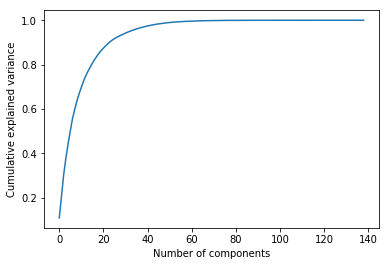

In [421]:
pca = PCA(n_components=139)
pca.fit(X_train_labeled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [422]:
k = 52
pca = PCA(n_components=k)
X_train_labeled = pca.fit_transform(X_train_labeled)

X_train_unlabeled = pca.transform(X_train_unlabeled)
X_test = pca.transform(X_test)
pca_std = np.std(X_train_labeled)

print(X_train_labeled.shape, X_train_unlabeled.shape, X_test.shape)

(9000, 52) (21000, 52) (8000, 52)


In [423]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y = encoder.transform(y_train)
onehot_y = np_utils.to_categorical(encoded_y)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [424]:
classifier_labeled = Sequential()
in_dim = X_train_labeled.shape[1]
out_dim = onehot_y.shape[1]

# first hidden layer
classifier_labeled.add(Dense(100, activation='relu', kernel_initializer='random_normal', input_dim=in_dim))
# second hidden layer
classifier_labeled.add(Dense(100, activation='relu', kernel_initializer='random_normal'))
# third hidden layer
classifier_labeled.add(Dense(100, activation='relu', kernel_initializer='random_normal'))
# output layer
classifier_labeled.add(Dense(out_dim, activation='softmax', kernel_initializer='random_normal'))

classifier_labeled.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])
classifier_labeled.fit(X_train_labeled, onehot_y, batch_size=100, epochs=100)

Epoch 1/100
9000/9000 [==============================] - 4s 435us/step - loss: 1.3273 - acc: 0.6119
Epoch 2/100
9000/9000 [==============================] - 1s 71us/step - loss: 0.4751 - acc: 0.8497
Epoch 3/100
9000/9000 [==============================] - 1s 74us/step - loss: 0.3655 - acc: 0.8870
Epoch 4/100
9000/9000 [==============================] - 1s 75us/step - loss: 0.3027 - acc: 0.9057
Epoch 5/100
9000/9000 [==============================] - 1s 68us/step - loss: 0.2593 - acc: 0.9166
Epoch 6/100
9000/9000 [==============================] - 1s 80us/step - loss: 0.2264 - acc: 0.9267
Epoch 7/100
9000/9000 [==============================] - 1s 76us/step - loss: 0.1937 - acc: 0.9399
Epoch 8/100
9000/9000 [==============================] - 1s 94us/step - loss: 0.1656 - acc: 0.9483
Epoch 9/100
9000/9000 [==============================] - 1s 99us/step - loss: 0.1482 - acc: 0.9536
Epoch 10/100
9000/9000 [==============================] - 1s 77us/step - loss: 0.1227 - acc: 0.9610
Epoch 11

9000/9000 [==============================] - 1s 67us/step - loss: 4.8030e-05 - acc: 1.0000
Epoch 81/100
9000/9000 [==============================] - 1s 65us/step - loss: 4.5092e-05 - acc: 1.0000
Epoch 82/100
9000/9000 [==============================] - 1s 64us/step - loss: 4.2699e-05 - acc: 1.0000
Epoch 83/100
9000/9000 [==============================] - 1s 64us/step - loss: 4.0188e-05 - acc: 1.0000
Epoch 84/100
9000/9000 [==============================] - 1s 68us/step - loss: 3.8251e-05 - acc: 1.0000
Epoch 85/100
9000/9000 [==============================] - 1s 66us/step - loss: 3.5972e-05 - acc: 1.0000
Epoch 86/100
9000/9000 [==============================] - 1s 99us/step - loss: 3.3517e-05 - acc: 1.0000
Epoch 87/100
9000/9000 [==============================] - 1s 97us/step - loss: 3.2059e-05 - acc: 1.0000
Epoch 88/100
9000/9000 [==============================] - 1s 67us/step - loss: 3.0185e-05 - acc: 1.0000
Epoch 89/100
9000/9000 [==============================] - 1s 67us/step - loss

In [425]:
def create_classifier(X_train, onehot_y, n_input_neurons, N_hidden_neurons):
    # define basic classifier model
    classifier = Sequential()
    in_dim = X_train.shape[1]
    out_dim = onehot_y.shape[1]
    # input layer
    classifier.add(Dense(n_input_neurons, activation='relu', kernel_initializer='random_normal', input_dim=in_dim))
    # build hidden layers of classifier
    for n in N_hidden_neurons:
        # create hidden layer
        classifier.add(Dense(n, activation='relu', kernel_initializer='random_normal'))
    # output layer
    classifier.add(Dense(out_dim, activation='softmax', kernel_initializer='random_normal'))
    # add SGD
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    classifier.compile(optimizer=sgd, loss='categorical_crossentropy', metrics =['accuracy'])
    return classifier

In [427]:
def augment_labeled_data(n_batches, tau, X_labeled, y, X_unlabeled, classifier):
    # initial model
    model = classifier
    # initially labeled data
    labeled_data = X_labeled.copy()
    labels = y.copy()
    # initial one-hot encoding for labels
    encoder = LabelEncoder()
    encoder.fit(labels)
    encoded_y = encoder.transform(labels)
    onehot_y = np_utils.to_categorical(encoded_y)
    # split unlabeled data into chunks
    batches = np.array_split(X_unlabeled, n_batches)
    # augment labeled data by chunks
    for i, batch in zip(range(1, n_batches+1), batches):
        print()
        print("AUGMENTING DATASET WITH BATCH #", i, ":")
        print()
        # pseudo labels for current batch
        pseudo_y = classifier.predict(batch)
        pseudo_maxes = np.max(pseudo_y, axis=-1)
        pseudo_classes = np.argmax(pseudo_y, axis=-1)
        pseudo_labels = pd.DataFrame({'y': pseudo_classes, 'confidence': pseudo_maxes})
        # only accept labels if confidence high enough
        labeling = pd.concat([pd.DataFrame(batch), pseudo_labels], axis=1)
        labeling = labeling[labeling.confidence >= tau]  
        print("Labels accepted: ", len(labeling), "/", len(batch))
        print()
        new_labeled_data = labeling.drop(columns=['y', 'confidence'])
        new_labels = labeling.drop(columns=['confidence']).iloc[:,labeling.shape[1]-2:]
        # append newly labeled batch to already labeled data
        labeled_data = pd.concat([pd.DataFrame(labeled_data), new_labeled_data])
        labels = pd.concat([labels, new_labels])
        # redo one-hot encoding for labels
        encoder.fit(labels)
        encoded_y = encoder.transform(labels)
        onehot_y = np_utils.to_categorical(encoded_y)
        # train new model with augmented data
        classifier = create_classifier(labeled_data, onehot_y, 500, [500, 500])
        classifier.fit(labeled_data, onehot_y, batch_size=1000, epochs=50)
    print()
    print("Size of final dataset: ", labeled_data.shape)
    return classifier

In [ ]:
n = 10
tau = 0.95
classifier_augmented = augment_labeled_data(n, tau, X_train_labeled, y_train, X_train_unlabeled, classifier_labeled)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



AUGMENTING DATASET WITH BATCH # 1 :

Labels accepted:  1984 / 2100

Epoch 1/50
10984/10984 [==============================] - 5s 418us/step - loss: 1.3958 - acc: 0.5865
Epoch 2/50
10984/10984 [==============================] - 2s 137us/step - loss: 0.6592 - acc: 0.8042
Epoch 3/50
10984/10984 [==============================] - 1s 121us/step - loss: 0.3484 - acc: 0.8897
Epoch 4/50
10984/10984 [==============================] - 2s 138us/step - loss: 0.2587 - acc: 0.9196
Epoch 5/50
10984/10984 [==============================] - 1s 116us/step - loss: 0.1992 - acc: 0.9387
Epoch 6/50
10984/10984 [==============================] - 1s 117us/step - loss: 0.1606 - acc: 0.9506
Epoch 7/50
10984/10984 [==============================] - 1s 117us/step - loss: 0.1262 - acc: 0.9634
Epoch 8/50
10984/10984 [==============================] - 1s 120us/step - loss: 0.1020 - acc: 0.9708
Epoch 9/50
10984/10984 [==============================] - 1s 116us/step - loss: 0.0840 - acc: 0.9770
Epoch 10/50
10984/1098

12876/12876 [==============================] - 2s 142us/step - loss: 0.0036 - acc: 0.9999 0s - loss: 0.0040 - acc: 0.9
Epoch 30/50
12876/12876 [==============================] - 2s 119us/step - loss: 0.0035 - acc: 0.9999
Epoch 31/50
12876/12876 [==============================] - 2s 123us/step - loss: 0.0033 - acc: 0.9999
Epoch 32/50
12876/12876 [==============================] - 2s 142us/step - loss: 0.0032 - acc: 0.9999
Epoch 33/50
12876/12876 [==============================] - 2s 147us/step - loss: 0.0031 - acc: 0.9999
Epoch 34/50
12876/12876 [==============================] - 2s 119us/step - loss: 0.0030 - acc: 0.9999
Epoch 35/50
12876/12876 [==============================] - 2s 132us/step - loss: 0.0029 - acc: 0.9999
Epoch 36/50
12876/12876 [==============================] - 2s 145us/step - loss: 0.0028 - acc: 0.9999
Epoch 37/50
12876/12876 [==============================] - 2s 140us/step - loss: 0.0028 - acc: 0.9999
Epoch 38/50
12876/12876 [==============================] - 2s 132

Epoch 8/50
16727/16727 [==============================] - 2s 134us/step - loss: 0.0498 - acc: 0.9876
Epoch 9/50
16727/16727 [==============================] - 2s 132us/step - loss: 0.0391 - acc: 0.9916
Epoch 10/50
16727/16727 [==============================] - 3s 175us/step - loss: 0.0291 - acc: 0.9950
Epoch 11/50
16727/16727 [==============================] - 2s 134us/step - loss: 0.0223 - acc: 0.9973
Epoch 12/50
16727/16727 [==============================] - 2s 118us/step - loss: 0.0169 - acc: 0.9986
Epoch 13/50
16727/16727 [==============================] - 3s 153us/step - loss: 0.0136 - acc: 0.9995
Epoch 14/50
16727/16727 [==============================] - 2s 128us/step - loss: 0.0107 - acc: 0.9997
Epoch 15/50
16727/16727 [==============================] - 2s 121us/step - loss: 0.0088 - acc: 0.9998
Epoch 16/50
16727/16727 [==============================] - 2s 121us/step - loss: 0.0073 - acc: 0.9999
Epoch 17/50
16727/16727 [==============================] - 2s 127us/step - loss: 0.0

18632/18632 [==============================] - 2s 114us/step - loss: 0.0018 - acc: 0.9999
Epoch 38/50
18632/18632 [==============================] - 2s 113us/step - loss: 0.0018 - acc: 0.9999
Epoch 39/50
18632/18632 [==============================] - 2s 114us/step - loss: 0.0017 - acc: 0.9999
Epoch 40/50
18632/18632 [==============================] - 2s 114us/step - loss: 0.0017 - acc: 0.9999
Epoch 41/50
18632/18632 [==============================] - 2s 115us/step - loss: 0.0017 - acc: 0.9999
Epoch 42/50
18632/18632 [==============================] - 2s 114us/step - loss: 0.0016 - acc: 0.9999
Epoch 43/50
18632/18632 [==============================] - 2s 115us/step - loss: 0.0016 - acc: 0.9999
Epoch 44/50
18632/18632 [==============================] - 2s 118us/step - loss: 0.0016 - acc: 0.9999
Epoch 45/50
18632/18632 [==============================] - 2s 116us/step - loss: 0.0015 - acc: 0.9999
Epoch 46/50
18632/18632 [==============================] - 2s 114us/step - loss: 0.0015 - acc:

22528/22528 [==============================] - 3s 136us/step - loss: 0.0047 - acc: 1.0000
Epoch 17/50
22528/22528 [==============================] - 3s 116us/step - loss: 0.0041 - acc: 0.9999
Epoch 18/50
22528/22528 [==============================] - 3s 130us/step - loss: 0.0036 - acc: 1.0000
Epoch 19/50
22528/22528 [==============================] - 3s 148us/step - loss: 0.0033 - acc: 1.0000
Epoch 20/50
22528/22528 [==============================] - 3s 131us/step - loss: 0.0030 - acc: 1.0000
Epoch 21/50
22528/22528 [==============================] - ETA: 0s - loss: 0.0028 - acc: 1.000 - 3s 118us/step - loss: 0.0028 - acc: 1.0000
Epoch 22/50
22528/22528 [==============================] - 4s 159us/step - loss: 0.0026 - acc: 1.0000
Epoch 23/50
22528/22528 [==============================] - 4s 157us/step - loss: 0.0024 - acc: 1.0000 1s - loss: 0.0018 - acc:
Epoch 24/50
22528/22528 [==============================] - 4s 162us/step - loss: 0.0023 - acc: 1.0000
Epoch 25/50
22528/22528 [======

24452/24452 [==============================] - 3s 114us/step - loss: 0.0012 - acc: 1.0000
Epoch 46/50
24452/24452 [==============================] - 3s 133us/step - loss: 0.0011 - acc: 1.0000
Epoch 47/50
24452/24452 [==============================] - 4s 151us/step - loss: 0.0011 - acc: 1.0000
Epoch 48/50
24452/24452 [==============================] - 3s 134us/step - loss: 0.0011 - acc: 1.0000
Epoch 49/50
24452/24452 [==============================] - 3s 129us/step - loss: 0.0011 - acc: 1.0000
Epoch 50/50
24452/24452 [==============================] - 4s 147us/step - loss: 0.0011 - acc: 1.0000

AUGMENTING DATASET WITH BATCH # 9 :

Labels accepted:  1915 / 2100

Epoch 1/50
26367/26367 [==============================] - 6s 243us/step - loss: 0.8561 - acc: 0.7466
Epoch 2/50
26367/26367 [==============================] - 3s 115us/step - loss: 0.2037 - acc: 0.9383
Epoch 3/50
26367/26367 [==============================] - 3s 115us/step - loss: 0.1193 - acc: 0.9644
Epoch 4/50
26367/26367 [====

In [410]:
pred_semi = classifier_augmented.predict(X_test)
# find most likely category from soft max
pred_semi = np.argmax(pred_semi, axis=-1)

In [411]:
# convert back to pandas dataframe
X_test = pd.DataFrame(X_test)
pred_submit = pd.DataFrame(list(zip(X_test.index.values + 30000, pred_semi)), columns=['Id', 'y'])
final_submit = pred_submit.to_csv("submit.csv", index=False)